For some reason, the loss goes up if running the following command:

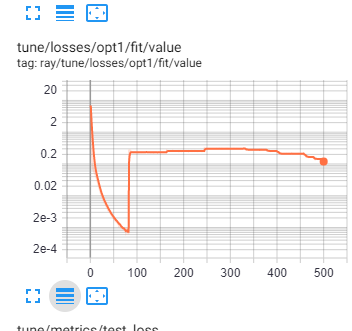
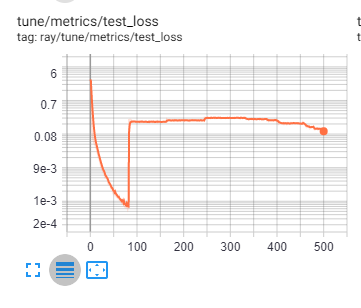

On the images, some green pixels are added, and they do not disappear

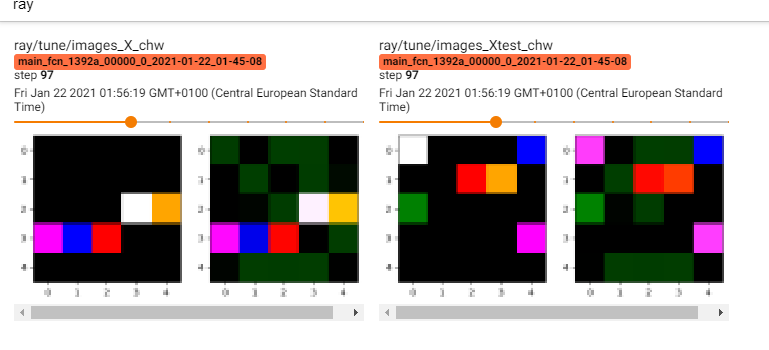

In [1]:
ckpt_dir = '/home/sergei/ray_results/dots/main_fcn_1392a_00000_0_2021-01-22_01-45-08'

In [2]:
%load_ext autoreload
%autoreload 2
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"
import torch
import numpy as np
from matplotlib import pyplot as plt
import torch
from causal_analysis.helpers import get_df_from_logdir, CPU_Unpickler
import pickle

UsageError: Line magic function `%autorelaod` not found.


In [ ]:
def get_ckpt_n(ckpt):
    """Get the number of the checkpoint."""
    idx = ckpt.find('checkpoint')
    ckpt = ckpt[idx:]
    n = int(ckpt.split('_')[1])
    return n
assert get_ckpt_n('sdfsdfcheckpoint_5000') == 5000

checkpoints = sorted(filter(lambda x: x.startswith('checkpoint'), os.listdir(ckpt_dir)), key=get_ckpt_n)
checkpoints = [os.path.join(ckpt_dir, x) for x in checkpoints]

In [ ]:
df = get_df_from_logdir(ckpt_dir)

In [ ]:
plt.figure(figsize=(20, 5))
plt.title("Loss")
plt.plot(df.epochs, df['losses/opt1/fit/value'], label='train_loss')
plt.plot(df.epochs, df['metrics/test_loss'], label='test_loss')
plt.yscale('log')
plt.legend()
plt.locator_params(axis='x', nbins=50)
plt.show()

In [ ]:
df['losses/opt1/fit/value'][80], df['losses/opt1/fit/value'][90]

In [ ]:
checkpoints[8], checkpoints[9]

In [ ]:
checkpoints[8]

In [ ]:
with open(os.path.join(checkpoints[8], 'checkpoint'), 'rb') as f:
    learner8 = CPU_Unpickler(f).load()

In [ ]:
?CPU_Unpickler